In [31]:
import pandas as pd 
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dei_df = pd.read_csv("DEI Dataset.csv")

In [9]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(dei_df.columns)

Index(['Id', 'Name', 'Surname', 'Division', 'Manager', 'Gender',
       'Sexual_Orientation', 'LGBTQ', 'Indigenous', 'Ethnicity', 'Disability',
       'Minority', 'Veteran', 'Date of Birth', 'Age', 'Preferred Name',
       'Nationality', 'Hobbies', 'Pronouns', 'Mobile Number', 'Email',
       'Aug_D_Q1', 'Aug_D_Q2', 'Aug_D_Q3', 'Aug_D_Q4', 'Aug_D_Q5',
       'D_Negative', 'D_Neutral', 'D_Positive', 'Aug_E_Q1', 'Aug_E_Q2',
       'Aug_E_Q3', 'Aug_E_Q4', 'Aug_E_Q5', 'E_Negative', 'E_Neutral',
       'E_Positive', 'Aug_I_Q1', 'Aug_I_Q2', 'Aug_I_Q3', 'Aug_I_Q4',
       'Aug_I_Q5', 'I_Negative', 'I_Neutral', 'I_Positive'],
      dtype='object')


## Interesting columns to consider
- Name 
- Division (Department) 
- Gender 
- Minority 
- Manager 
- Ethnicity 
- LGBTQ
- Disability 

## Overall Gender Distribution 

['Asian: 17.18%',
 'Black: 4.16%',
 'Latin: 2.09%',
 'Middle Eastern: 3.52%',
 'Other: 1.05%',
 'Prefer not to say: 1.08%',
 'White: 70.92%']

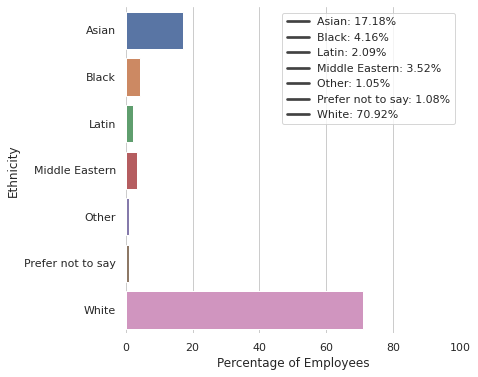

In [211]:
# Overall Gender 
overall_gender_df = pd.DataFrame(dei_df.groupby('Gender').count()['Id']).rename({'Id': 'Number of Genders'}, axis=1)
labels = overall_gender_df.index
data = overall_gender_df['Number of Genders'].tolist()

# Overall Ethnicity Balance 
overall_eth = pd.DataFrame(dei_df.groupby('Ethnicity').count()['Id']).rename({'Id': 'Number of Genders'}, axis=1)
labels = overall_eth.index
data = ((overall_eth['Number of Genders']/overall_eth['Number of Genders'].sum()) * 100).tolist()
f, ax = plt.subplots(figsize=(6, 6))

ax.set(xlabel="Percentage of Employees")
ax.set_xlim([0, 100])
sns.despine(left=True, bottom=True)
sns.barplot(x=data , y=labels, data=overall_eth,
            label="Amount of Employees")
sns.despine(left=True, bottom=True)

# custom legend labels
legend_labels = [f'{labels[index]}: {data[index]}%' for index in range(len(labels))]
ax.legend(legend_labels, loc="upper right")

legend_labels

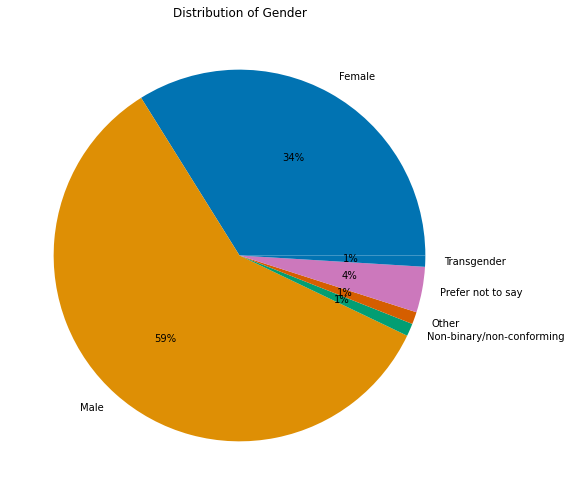

In [78]:
# Display 
colors = sns.color_palette('colorblind')[0:5]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Distribution of Gender')
plt.tight_layout()

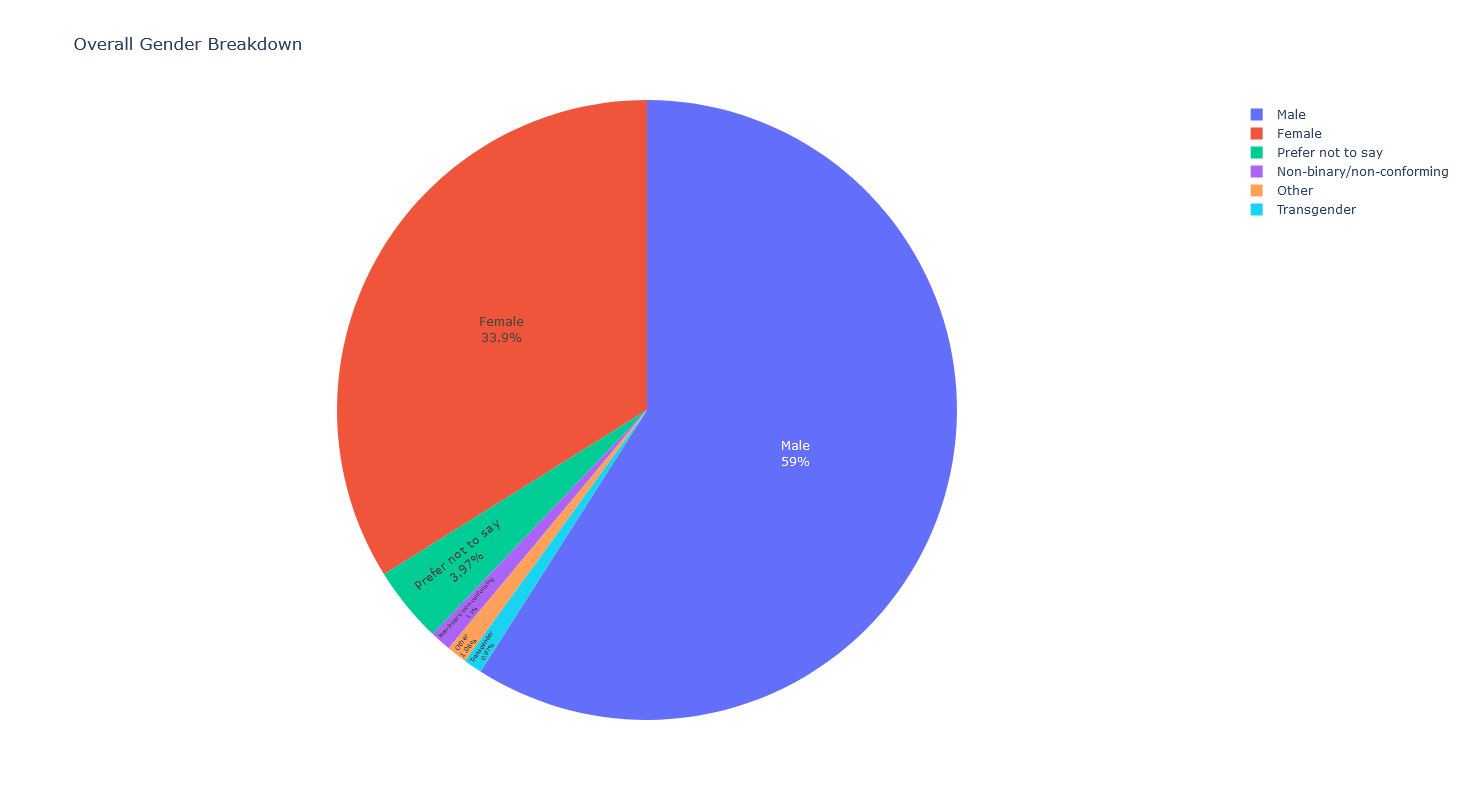

In [386]:
import plotly.express as px
labels = overall_gender_df.index
data = overall_gender_df['Number of Genders'].tolist()
fig = px.pie(overall_gender_df, values='Number of Genders', names=labels, title='Overall Gender Breakdown')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1400,height=800,)
fig.show()

## Gender Per Department 

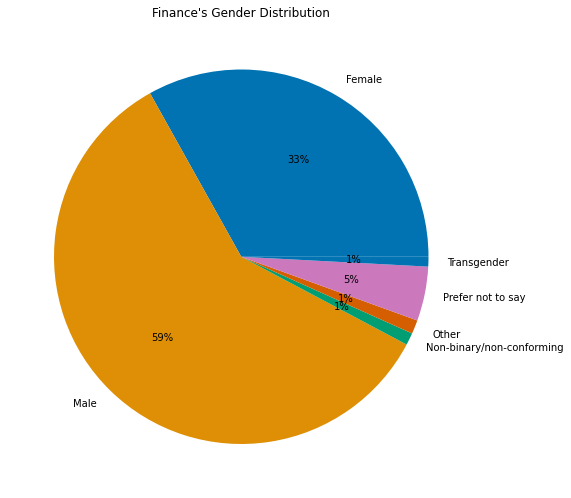

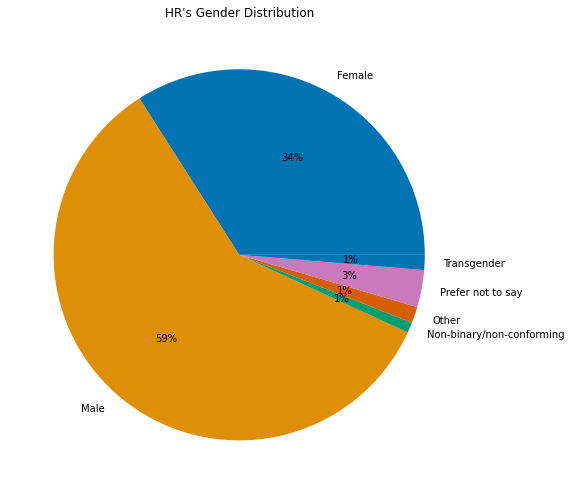

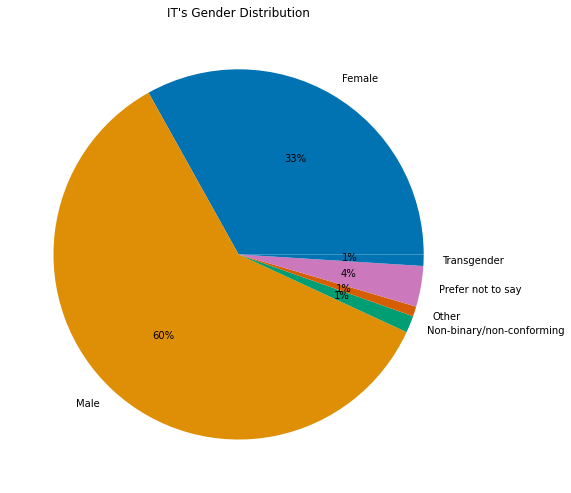

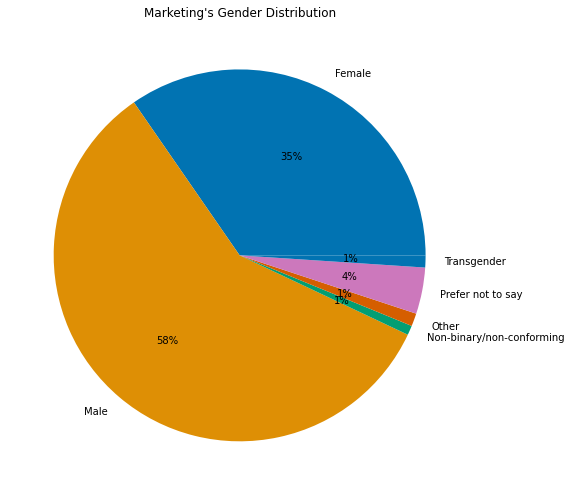

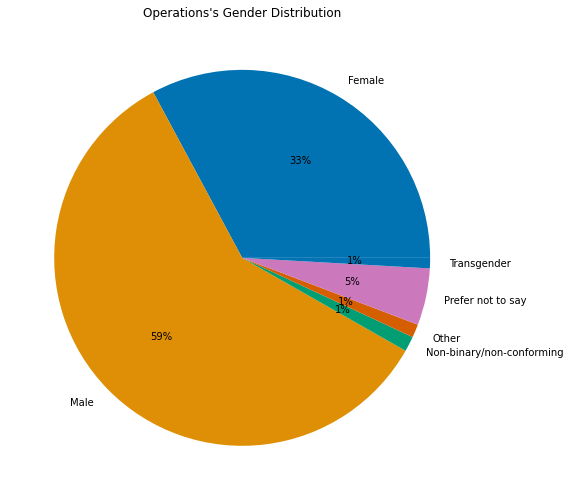

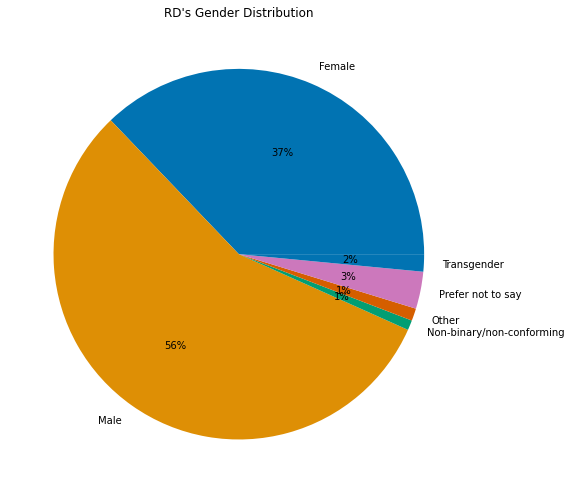

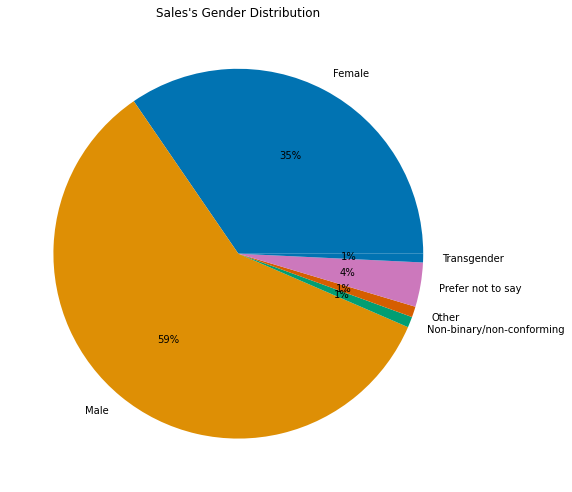

In [162]:
# Gender Per Department 
gender_dept_df = pd.DataFrame(dei_df.groupby(['Division', 'Gender']).count()['Id']).rename({'Id': 'Number of Genders'}, axis=1)
all_dept = dei_df.groupby('Division').count()['Id'].index.tolist()

# for dept in all_dept:
for dept in all_dept:
    current_dept_info = dei_df.groupby(['Division', 'Gender']).count()['Id'][dept]
    label = current_dept_info.index.tolist()
    data = current_dept_info.values
    colors = sns.color_palette('colorblind')[0:5]
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    ax.set_title(f'{dept}\'s Gender Distribution')
    plt.tight_layout()

In [135]:
# Gender Per Department 
dei_df.groupby(['Division', 'Gender', "LGBTQ"]).count()['Id'].Finance

Gender                     LGBTQ            
Female                     No                   395
                           Prefer not to say     31
                           Yes                   47
Male                       No                   689
                           Prefer not to say     60
                           Yes                   96
Non-binary/non-conforming  No                    10
                           Yes                    5
Other                      No                    13
                           Prefer not to say      3
                           Yes                    1
Prefer not to say          No                    56
                           Prefer not to say      5
                           Yes                    6
Transgender                Prefer not to say      5
                           Yes                    7
Name: Id, dtype: int64

In [256]:
# Minortiy Per department
all_dept = dei_df.groupby('Division').count()['Id'].index.tolist()
minority_df = pd.DataFrame(index=all_dept, columns=['Total Minorities','Total People', 'Percentage of Minorities 2022'])

for dept in all_dept:
    dept_info = dei_df.groupby(['Division', 'Minority']).count()['Id'][dept]
    minority_df.loc[dept]['Total Minorities'] = dept_info.Yes
    minority_df.loc[dept]['Total People'] = dept_info.sum()
    minority_df.loc[dept]['Percentage of Minorities 2022'] = round((dept_info.Yes/dept_info.sum())*100,2)

minority_df

,Total Minorities,Total People,Percentage of Minorities 2022
Finance,327,1429,22.88
HR,230,990,23.23
IT,498,2306,21.6
Marketing,286,1340,21.34
Operations,255,1227,20.78
RD,107,463,23.11
Sales,503,2245,22.41


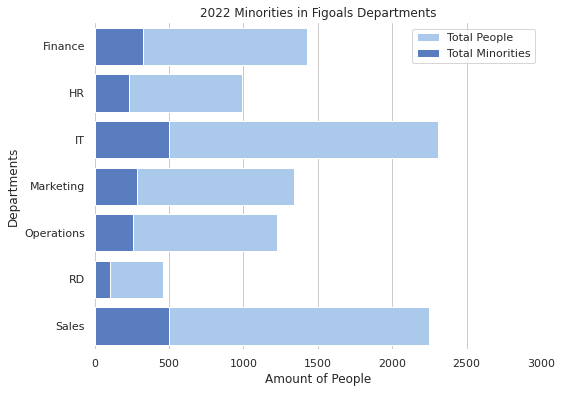

In [257]:
# plot 
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Total People", y=all_dept, data=minority_df, label="Total People", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Total Minorities", y=all_dept,data=minority_df, label="Total Minorities", color="b").set_title('2022 Minorities in Figoals Departments')

ax.legend(loc="upper right", frameon=True)
ax.set(xlim=(0, 3000), ylabel="Departments",xlabel="Amount of People")
sns.despine(left=True, bottom=True)

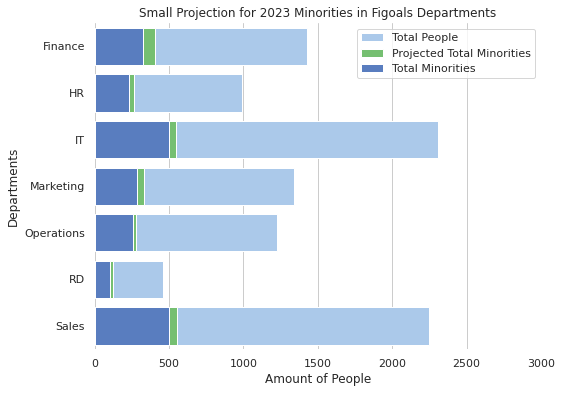

In [338]:
# randomly gen pct_change 
minority_percentages_2023 = [28.28, 26.95, 23.76, 24.69, 22.86, 27.17, 24.65]
minority_df['Percentage of Minorities 2023'] = minority_percentages_2023
minority_df['Total Minorities in 20223'] = minority_df['Total People']  * (minority_df['Percentage of Minorities 2023']/100)
minority_df['colors'] = None
colors = []
for dept in minority_df.index:
    curr_dept = minority_df.loc[dept]
    if curr_dept['Percentage of Minorities 2023'] > curr_dept['Percentage of Minorities 2022']:
        colors.append((0, 128, 0, 1))
    else:
        colors.append((255, 0, 0, 1))
minority_df['colors']=colors
# plot 
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Total People", y=all_dept, data=minority_df, label="Total People", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Total Minorities in 20223", y=all_dept, data=minority_df, label="Projected Total Minorities", color='g').set_title('Small Projection for 2023 Minorities in Figoals Departments')
sns.barplot(x="Total Minorities", y=all_dept, data=minority_df, label="Total Minorities", color="b")

ax.legend(loc="upper right", frameon=True)
ax.set(xlim=(0, 3000), ylabel="Departments",xlabel="Amount of People")
sns.despine(left=True, bottom=True)


In [341]:
(minority_df['Percentage of Minorities 2023']/100 - minority_df['Percentage of Minorities 2022']/100).mean()*100

3.2871428571428565

In [319]:
22.88/100 * 1429 	

326.9552

In [344]:
# Disabilities


,Total Minorities,Total People,Percentage of Minorities 2022,Percentage of Minorities 2023,colors,Total Minorities in 20223
Finance,327,1429,22.88,28.28,"(0, 128, 0, 1)",404.1212
HR,230,990,23.23,26.95,"(0, 128, 0, 1)",266.805
IT,498,2306,21.6,23.76,"(0, 128, 0, 1)",547.9056
Marketing,286,1340,21.34,24.69,"(0, 128, 0, 1)",330.846
Operations,255,1227,20.78,22.86,"(0, 128, 0, 1)",280.4922
RD,107,463,23.11,27.17,"(0, 128, 0, 1)",125.7971
Sales,503,2245,22.41,24.65,"(0, 128, 0, 1)",553.3925


In [364]:
dei_df.groupby(['Disability'])['Id'].count()
label = dei_df.groupby(['Disability'])['Id'].count().index.tolist()
data = dei_df.groupby(['Disability'])['Id'].count().tolist()
disability_df = pd.DataFrame(index=label)
disability_df['Amount of People'] = data
disability_df

,Amount of People
No,8171
Prefer not to say,284
Yes,1545


In [371]:
import plotly.express as px

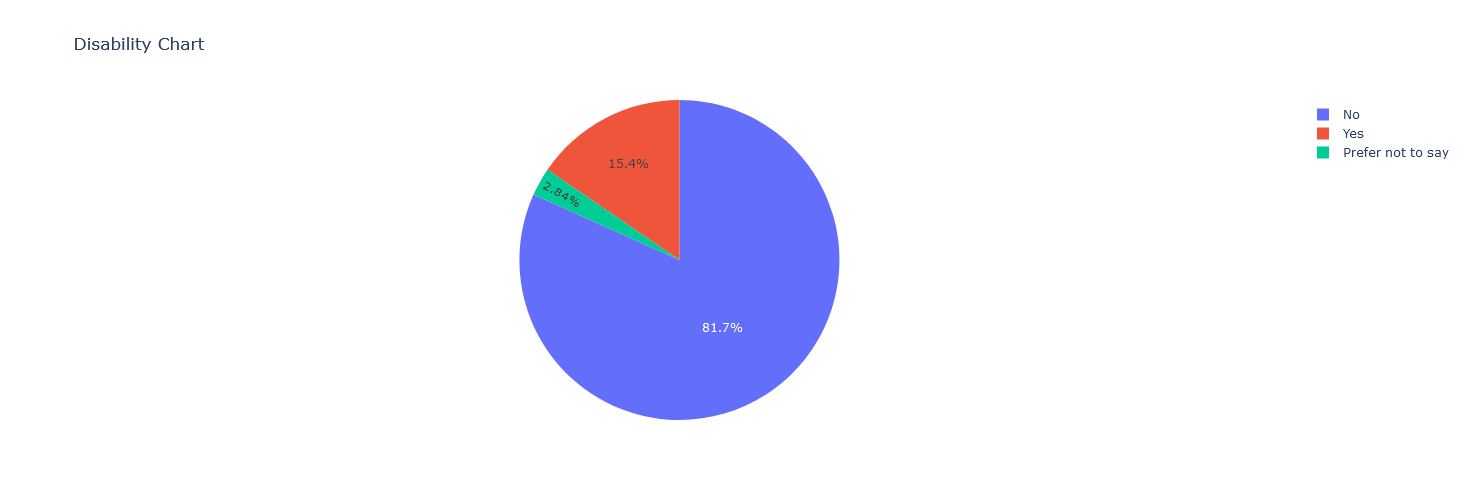

In [375]:
fig = px.pie(disability_df, values='Amount of People', names=label,
             title='Disability Chart',)
fig.update_traces(textposition='inside')
fig.update_layout(    width=500,
    height=500,)
fig.show()

In [394]:
#LGBTQ
dei_df.groupby('LGBTQ').count()['Id'].index.tolist()

['No', 'Prefer not to say', 'Yes']

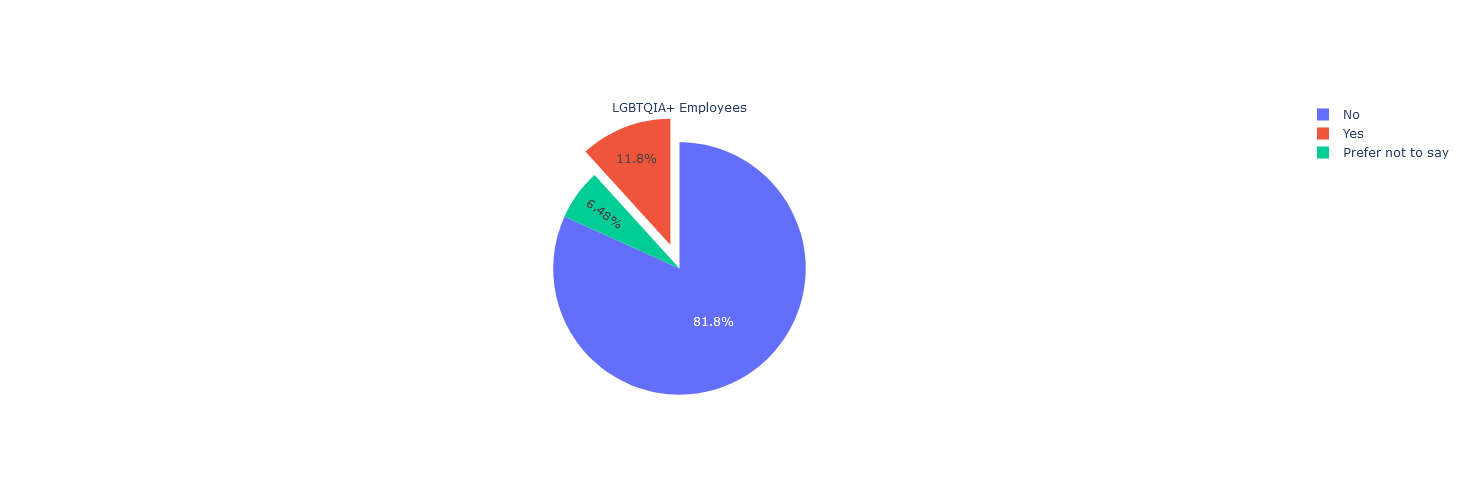

In [397]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=dei_df.groupby('LGBTQ').count()['Id'].index.tolist(), values=dei_df.groupby('LGBTQ').count()['Id'].tolist(), pull=[0, 0, 0.2, 0], title='LGBTQIA+ Employees')])
fig.update_layout(    width=500,
    height=500,)
fig.show()